In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
# t-test
from scipy.stats import ttest_ind
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# chi-square
from scipy.stats import (chi2,chi2_contingency)

In [141]:
df = pd.read_csv("wineQualityRedS.csv")
df

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [142]:
df.shape

(1599, 13)

# Data Cleaning

In [143]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Length: 1599, dtype: bool

Now will check for null values

In [144]:
df.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

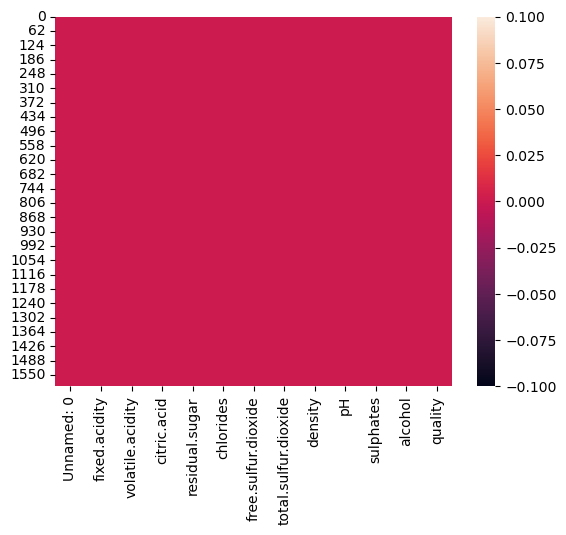

In [145]:
sns.heatmap(df.isnull())

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [147]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [148]:
df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [149]:
datatype=df['quality'].dtype
print(datatype)

int64


In [150]:
df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: >

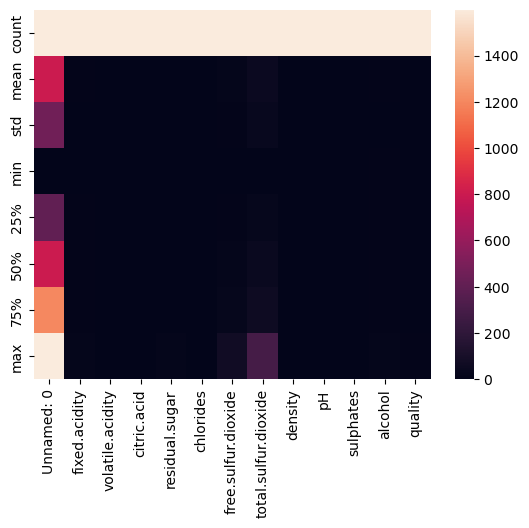

In [151]:
sns.heatmap(df.describe())

In [152]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


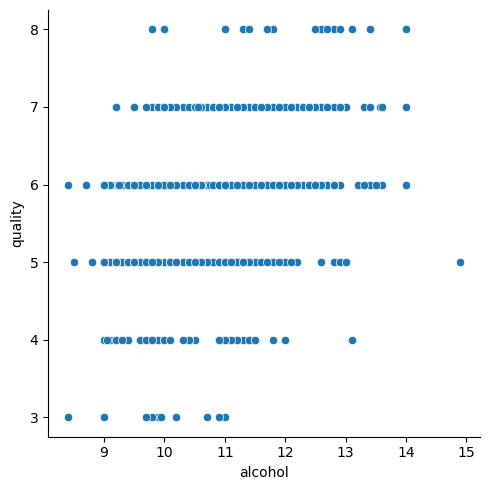

In [153]:
sns.relplot(x='alcohol',y='quality',data=df)

In [154]:
value_counts = df['quality'].value_counts()
print(value_counts)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<Axes: xlabel='quality', ylabel='Density'>

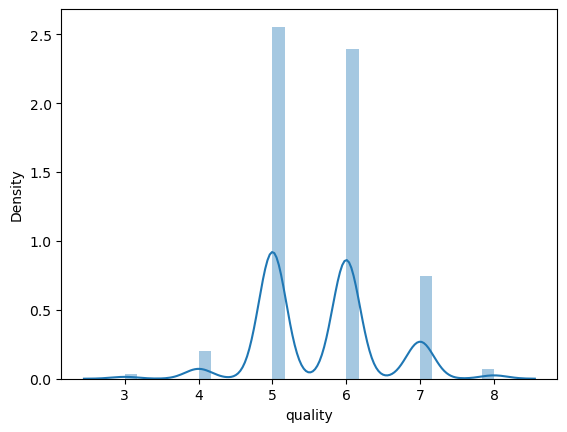

In [155]:
sns.distplot(df.quality)

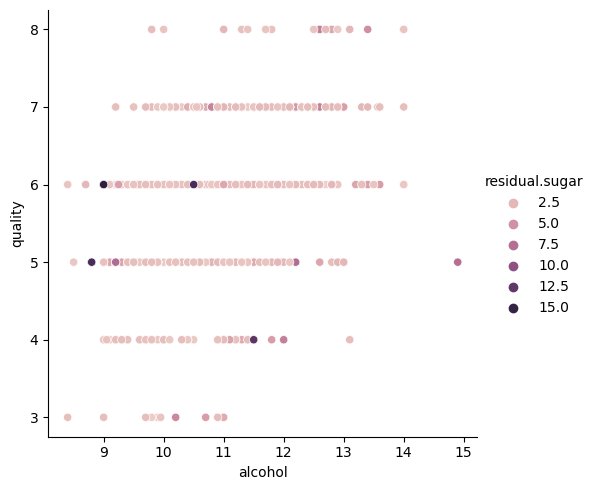

In [156]:
sns.relplot(x='alcohol',y='quality',hue='residual.sugar',data = df)

# Feature Engineering

# Split the dataframe into X & y

In [157]:
y = df['quality']
X= df.drop("quality",axis=1)

In [158]:
X.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [159]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [160]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (1599, 12) 
y Shape = (1599,)


# Train Test Split

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [162]:
X_train.shape,y_train.shape

((1279, 12), (1279,))

In [163]:
y_train.shape,y_test.shape

((1279,), (320,))

# Build the Regression Algorithm

In [164]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Evaluation Metrics

In [106]:
# Train Score
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.36608825346335083


In [107]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.33040651574435476


In [108]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 0.47356981735262116
Mean Squared Error = 0.3809293791534435
Root Mean Squared Error = 0.6171947659802727


I have used log transformation to convert right skewed data into normal distribution so we are using exp to convert into antilog

In [109]:
# To find the intercept 
print('Intercept =',np.exp(lr.intercept_))

Intercept = 1.7467495472202514e+18


In [110]:
# To find the co-efficients
print('coefficients =',np.exp(lr.coef_))

coefficients = [9.99955055e-01 1.04515443e+00 3.27883305e-01 7.64246657e-01
 1.02121745e+00 1.67338995e-01 1.00594389e+00 9.96342911e-01
 2.71474910e-17 6.88422417e-01 2.50650254e+00 1.30874585e+00]


In [111]:
pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_pred),'Variance':np.exp(y_test)-np.exp(y_pred)})

,Actual,Predicted,Variance
75,148.413159,259.259193,-110.846034
1283,403.428793,210.297689,193.131104
408,403.428793,452.866281,-49.437487
1281,403.428793,303.277927,100.150866
1118,403.428793,809.959854,-406.531060
...,...,...,...
890,148.413159,306.007951,-157.594792
146,148.413159,158.811906,-10.398747
1551,148.413159,162.879890,-14.466731
1209,1096.633158,483.576915,613.056243


# Importing Libraries to Build OLS Model

In [112]:
# Needed libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

# Train and Test Split

In [113]:
# Now, split data into train and test in approx 70:30 ratio
round(1599*.7,0)

1119.0

In [116]:
ols_train = df.iloc[0:1119, ]
ols_test = df.iloc[1119:1599, ]

In [138]:
ols_train.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score

In [170]:
X = df.drop('quality',axis=1)
y = df['quality']

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)

In [173]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [174]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [175]:
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        39
           5       0.63      0.47      0.54       463
           6       0.45      0.78      0.58       450
           7       0.00      0.00      0.00       144
           8       0.00      0.00      0.00        15

    accuracy                           0.51      1119
   macro avg       0.18      0.21      0.19      1119
weighted avg       0.44      0.51      0.45      1119

[[  0   0   2   6   0   0]
 [  0   0  11  28   0   0]
 [  0   0 218 245   0   0]
 [  0   0  98 352   0   0]
 [  0   0  15 129   0   0]
 [  0   0   1  14   0   0]]


In [176]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.63      0.47      0.54       218
           6       0.42      0.71      0.53       188
           7       0.00      0.00      0.00        55
           8       0.00      0.00      0.00         3

    accuracy                           0.49       480
   macro avg       0.18      0.20      0.18       480
weighted avg       0.45      0.49      0.45       480

[[  0   0   0   2   0   0]
 [  0   0   1  13   0   0]
 [  0   0 102 116   0   0]
 [  0   0  54 134   0   0]
 [  0   0   4  51   0   0]
 [  0   0   1   2   0   0]]
